In [17]:
# Exploratory Data Analysis (EDA) on Fashion Products Dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Load dataset
df = pd.read_csv("C:/Users/HP/Downloads/fashion_products.csv")
df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


In [19]:
# Dataset overview
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe(include='all'))

Dataset Shape: (1000, 9)

Data Types:
 User ID           int64
Product ID        int64
Product Name     object
Brand            object
Category         object
Price             int64
Rating          float64
Color            object
Size             object
dtype: object

Missing Values:
 User ID         0
Product ID      0
Product Name    0
Brand           0
Category        0
Price           0
Rating          0
Color           0
Size            0
dtype: int64

Summary Statistics:
            User ID   Product ID Product Name Brand       Category  \
count   1000.00000  1000.000000         1000  1000           1000   
unique         NaN          NaN            5     5              3   
top            NaN          NaN        Jeans  Nike  Kids' Fashion   
freq           NaN          NaN          231   214            351   
mean      50.41900   500.500000          NaN   NaN            NaN   
std       28.78131   288.819436          NaN   NaN            NaN   
min        1.00000     1.000000  

In [20]:
# ---------------------------
# 1. Ask Meaningful Questions
# ---------------------------
# - Which brands are most popular?
# - What is the average price in each category?
# - Is there a relationship between price and rating?
# - Are there any anomalies in price or rating?
# - Which category has the highest rated products?

In [21]:
# -------------------------------------------
# 2. Explore Data Structure and Data Overview
# -------------------------------------------
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe(include='all'))

Dataset Shape: (1000, 9)

Data Types:
 User ID           int64
Product ID        int64
Product Name     object
Brand            object
Category         object
Price             int64
Rating          float64
Color            object
Size             object
dtype: object

Missing Values:
 User ID         0
Product ID      0
Product Name    0
Brand           0
Category        0
Price           0
Rating          0
Color           0
Size            0
dtype: int64

Summary Statistics:
            User ID   Product ID Product Name Brand       Category  \
count   1000.00000  1000.000000         1000  1000           1000   
unique         NaN          NaN            5     5              3   
top            NaN          NaN        Jeans  Nike  Kids' Fashion   
freq           NaN          NaN          231   214            351   
mean      50.41900   500.500000          NaN   NaN            NaN   
std       28.78131   288.819436          NaN   NaN            NaN   
min        1.00000     1.000000  

C:\Users\HP\AppData\Local\Temp\ipykernel_5080\3066603977.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Brand", order=df['Brand'].value_counts().index, palette="pastel")


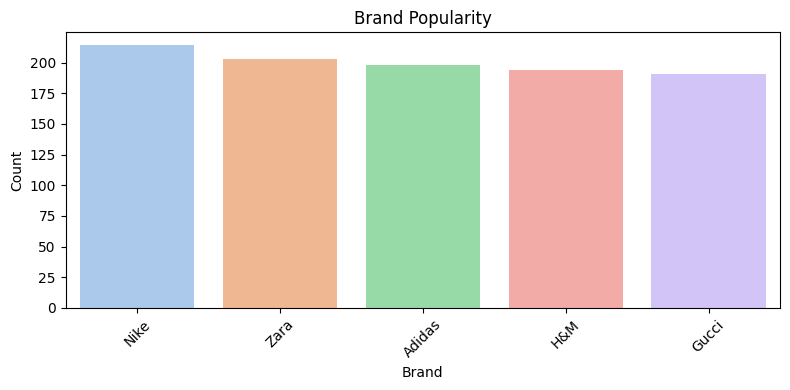

In [22]:
# --------------------------------------------------
# 3. Identify Trends, Patterns and Anomalies (Visuals)
# --------------------------------------------------

# Brand Popularity
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Brand", order=df['Brand'].value_counts().index, palette="pastel")
plt.title("Brand Popularity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5080\2418885460.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Category", y="Price", estimator=np.mean, palette="muted")


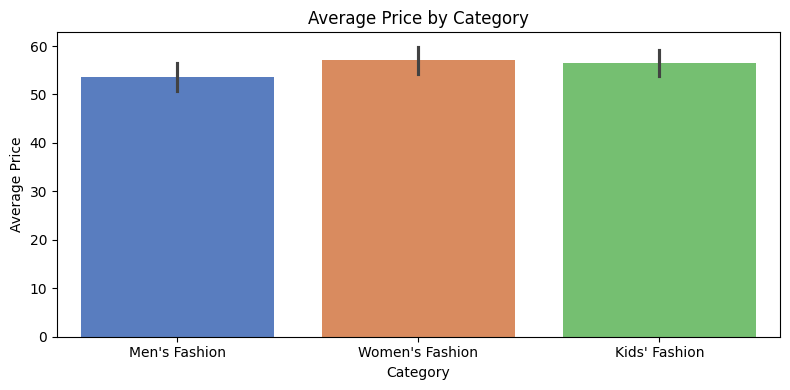

In [23]:
# Average Price by Category
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x="Category", y="Price", estimator=np.mean, palette="muted")
plt.title("Average Price by Category")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()


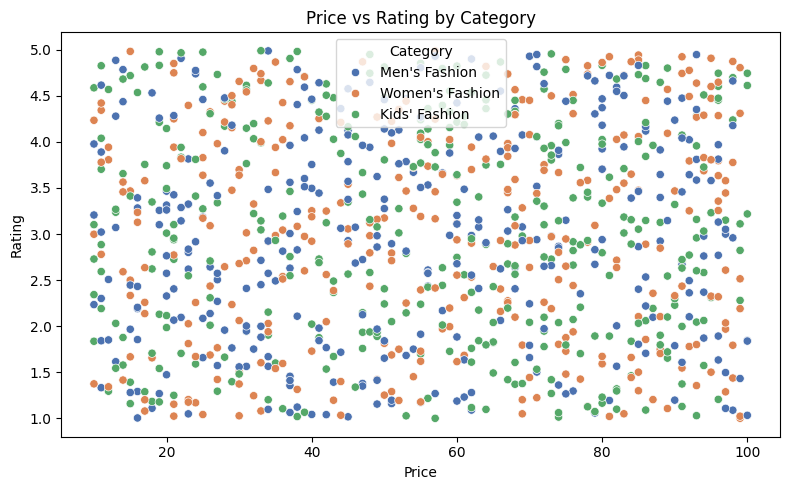

In [24]:
# Price vs Rating Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Price", y="Rating", hue="Category", palette="deep")
plt.title("Price vs Rating by Category")
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5080\1491568403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Brand", y="Rating", palette="Set2")


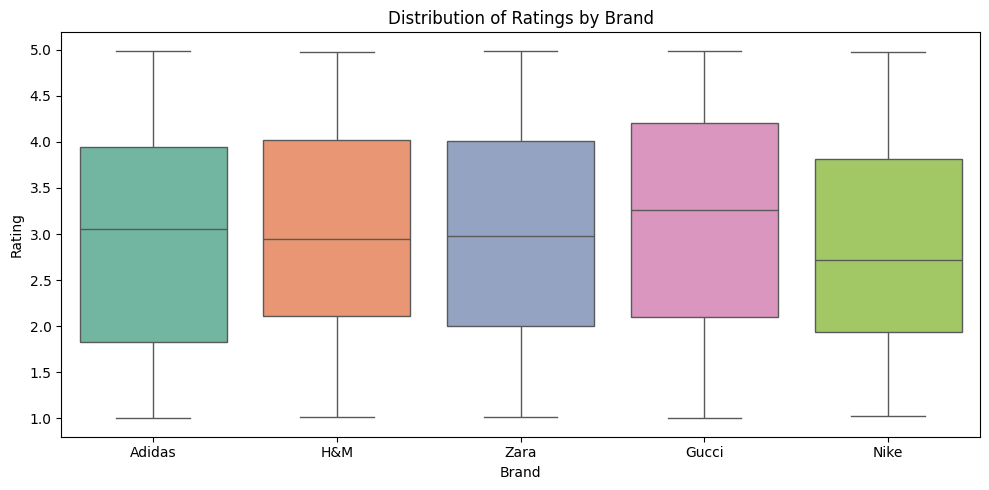

In [25]:
# Boxplot of Rating by Brand
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Brand", y="Rating", palette="Set2")
plt.title("Distribution of Ratings by Brand")
plt.tight_layout()
plt.show()

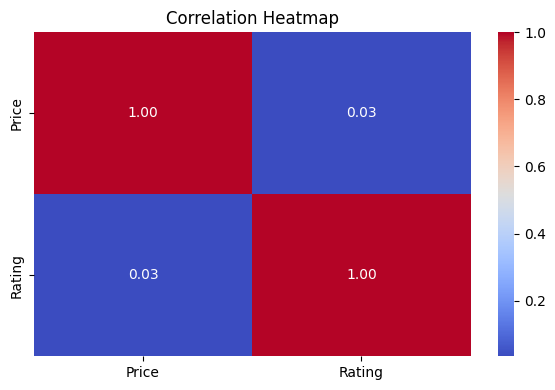

In [26]:
# ----------------------------------
# 4. Hypothesis Testing & Correlation
# ----------------------------------

# Heatmap of Correlation
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Price', 'Rating']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [27]:
# -----------------------------
# 5. Detect Potential Data Issues
# -----------------------------

# Check for duplicates
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)



Number of duplicate rows: 0


In [28]:
# Check for outliers in Price and Rating using IQR
Q1 = df[['Price', 'Rating']].quantile(0.25)
Q3 = df[['Price', 'Rating']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[['Price', 'Rating']] < (Q1 - 1.5 * IQR)) | (df[['Price', 'Rating']] > (Q3 + 1.5 * IQR))).sum()
print("\nPotential Outliers in 'Price' and 'Rating':\n", outliers)



Potential Outliers in 'Price' and 'Rating':
 Price     0
Rating    0
dtype: int64


In [29]:
# Missing values per column
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 User ID         0
Product ID      0
Product Name    0
Brand           0
Category        0
Price           0
Rating          0
Color           0
Size            0
dtype: int64


In [30]:
# Count duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [31]:
# Outlier detection using IQR
Q1 = df[['Price', 'Rating']].quantile(0.25)
Q3 = df[['Price', 'Rating']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[['Price', 'Rating']] < (Q1 - 1.5 * IQR)) | (df[['Price', 'Rating']] > (Q3 + 1.5 * IQR))).sum()
print("\nPotential Outliers in 'Price' and 'Rating':\n", outliers)


Potential Outliers in 'Price' and 'Rating':
 Price     0
Rating    0
dtype: int64


In [32]:
print("Data Types:\n", df.dtypes)

Data Types:
 User ID           int64
Product ID        int64
Product Name     object
Brand            object
Category         object
Price             int64
Rating          float64
Color            object
Size             object
dtype: object


In [33]:
# Unique values in 'Category' and 'Brand'
print("Unique Categories:", df['Category'].unique())
print("Unique Brands:", df['Brand'].unique())

Unique Categories: ["Men's Fashion" "Women's Fashion" "Kids' Fashion"]
Unique Brands: ['Adidas' 'H&M' 'Zara' 'Gucci' 'Nike']
